# Проект для курса Я.Практикум, спринт "Анализ бизнес-показателей".  Исследование маркетинговых данных развлекательного приложения Procrastinate Pro+.


## Цель проекта: 

### Выделить причины неэффективности привлечения пользователей.


### Получить ответы на вопросы:

1. Откуда приходят пользователи и какими устройствами они пользуются,
2. Сколько стоит привлечение пользователей из различных рекламных каналов;
3. Сколько денег приносит каждый клиент,
4. Когда расходы на привлечение клиента окупаются,
5. Какие факторы мешают привлечению клиентов.


## Данные: 

Представленные заказчиком датасеты - данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

visits_info_short.csv —  лог сервера с информацией о посещениях сайта, 
orders_info_short.csv — информация о заказах,  
costs_info_short.csv — информация о расходах на рекламу.

**Структура visits_info_short.csv:**

**User Id** — уникальный идентификатор пользователя

**Region** — страна пользователя

**Device** — тип устройства пользователя

**Channel** — идентификатор источника перехода

**Session Start** — дата и время начала сессии

**Session End** — дата и время окончания сессии


**Структура orders_info_short.csv:**

**User Id** — уникальный идентификатор пользователя

**Event Dt** — дата и время покупки

**Revenue** — сумма заказа


**Структура costs_info_short.csv:**

**dt** — дата проведения рекламной кампании

**Channel** — идентификатор рекламного источника

**costs** — расходы на эту кампанию




## План исследования:

1. [Загрузка данных](#load) 
2. [Предобработка данных](#preprocessing)
3. [Подготовка функций для расчёта и анализа LTV, ROI, удержания и конверсии](#func)
4. [Исследовательский анализ данных согласно целям проекта](#research)
5. [Маркетинг](#marketing)
6. [Оценка окупаемости рекламы](#roi)
7. [Общие выводы](#conclusion)

### 1. Загрузка данных <a id='load'></a>

In [1]:
#Импортируем нужные библиотеки
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date, datetime, timedelta

pd.set_option('display.max_columns', None)

In [2]:
#Открываем файлы
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

except:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')

In [3]:
#Объявим функцию для ознакомления с общей информацией
def data_description(df):
    '''функция для вывода данных о датасете -info, describe, первые 5 строк, количество и процент явных дубликатов'''
    result = display(df.info()), display(df.describe()), display(df.head()), 
    display('Количество явных дубликатов:', df.duplicated().sum()),
    display('Процент явных дубликатов:', round((df.duplicated().sum()/len(df))*100, 2))
    return result

In [4]:
#Изучим общую информацию и посмотрим первые строки
display('Лог сервера с информацией о посещениях сайта')
data_description(visits)

'Лог сервера с информацией о посещениях сайта'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


'Количество явных дубликатов:'

0

'Процент явных дубликатов:'

0.0

(None, None, None)

In [5]:
display('Информация о заказах')
data_description(orders)

'Информация о заказах'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


'Количество явных дубликатов:'

0

'Процент явных дубликатов:'

0.0

(None, None, None)

In [6]:
display('Информация о расходах на рекламу')
data_description(costs)

'Информация о расходах на рекламу'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


'Количество явных дубликатов:'

0

'Процент явных дубликатов:'

0.0

(None, None, None)

**Выводы**

- Пропусков в данных нет
- Необходимо привести названия столбцов в нижний регистр и заменить пробелы на нижнее подчеркивание
- Необходимо изменить тип данных в столбцах с данными о дате и времени

### 2. Предобработка данных <a id='preprocessing'></a>

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [7]:
#Приведем названия столбцов к единому стилю

visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower()
display(visits.head(2))
display(orders.head(2))
display(costs.head(2))

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1


In [8]:
#Изменим тип данных в столбцах с датой и временем

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

display(visits.info())
display(orders.info())
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [9]:
#Проверим, что текстовые значения уникальны, нет ошибок в написании, которых могут привести к неявным дубликатам
display(visits['region'].unique())
display(visits['device'].unique())
visits['channel'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

**Выводы**

- Названия столбцов приведены к единому стилю
- Исправлены тип данных в столбцах с данными о дате и времени
- Дубликатов в данных нет

### 3. Подготовка функций для расчёта и анализа LTV, ROI, удержания и конверсии <a id='func'></a>

Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.


Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### get_profiles — функция для создания профилей пользователей

In [11]:
def get_profiles(sessions, orders, ad_costs):
    
    '''функция для создания профилей пользователей
    Принимает на входе sessions, orders, ad_costs
    Выдает в результате profiles'''

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### get_retention - функция для расчёта коэффициента удержания

Её аргументы:

profiles — профили пользователей,
sessions — данные журнала сессий,
observation_date — момент анализа,
horizon_days — горизонт анализа в днях,
ignore_horizon — опция «игнорировать горизонт анализа», по умолчанию False.

за один вызов get_retention() получать сразу три таблицы:

сырые данные,
таблицу удержания,
таблицу динамики удержания.
Таблица динамики удержания отличается от простой таблицы удержания группировкой по дополнительному признаку — 
дате привлечения пользователей. Добавим в тело функции get_retention() создание таблицы result_in_time,
которая будет сгруппирована по всем признакам из dimensions, а также столбцу dt.

Если заменить прописанный в этом блоке столбец dt на передаваемый список столбцов, функция станет универсальной 
и сможет строить таблицы удержания для любых когорт.

Добавим в объявление функции get_retention() аргумент dimensions и заменим на него dt в части с расчётом удержания.

In [12]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    '''get_retention - функция для расчёта коэффициента удержания
    принимает profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[], (по умолчанию dimensions = ['payer'] + dimensions)
    ignore_horizon=False
    выдает в результате result_raw, result_grouped, result_in_time'''

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### get_conversion — функция для подсчёта конверсии

In [13]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    '''get_conversion — функция для подсчёта конверсии
    принимает profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
    выдает в результате result_raw, result_grouped, result_in_time'''

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### get_ltv — функция для подсчёта LTV

In [14]:
def get_ltv(
    profiles,  
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    '''get_ltv — функция для подсчёта LTV
    принимает profiles,  
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
    выдает в результате result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI'''

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')


    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    #лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        #сумма выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        #размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        #Объединияем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        #Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### filter_data — функция для сглаживания данных

In [15]:
def filter_data(df, window):
    '''filter_data — функция для сглаживания данных
    принимает на входе df, window
    для каждого столбца применяет скользящее среднее
    в результате df'''
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### plot_retention — функция для построения графика Retention Rate

In [16]:
def plot_retention(retention, retention_history, horizon):
    '''plot_retention — функция для построения графика Retention Rate
    принимает retention, retention_history, horizon
    строит кривые удержания и динамику удержания платящих и неплатящих'''

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    ).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # исключаем наложение графиков друг на друга
    plt.tight_layout()

    plt.show()

#### plot_conversion — функция для построения графика конверсии

In [17]:
def plot_conversion(conversion, conversion_history, horizon, window=7):
    '''plot_conversion — функция для построения графика конверсии
    принимает conversion, conversion_history, horizon, window=7
    строит кривые конверсии и динамику конверсии'''

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')

#### plot_ltv_roi — функция для визуализации LTV и ROI

In [18]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    '''plot_ltv_roi — функция для визуализации LTV и ROI
    принимает ltv, ltv_history, roi, roi_history, horizon, window=7
    строит 5 графиков: кривые ltv, динамика ltv, динамика cac, кривые roi, динамика roi'''

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Выводы**

- Функции подготовлены для дальнейшей работы

### 4. Исследовательский анализ данных согласно целям проекта <a id='research'></a>

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей. Убедимся, что данные соответствуют описанию от заказчика.

In [19]:
#Составим профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head())

#Определим минимальную и максимальную даты привлечения пользователей
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

display('Минимальная дата привлечения пользователей: ', min_analysis_date)
display('Максимальная дата привлечения пользователей: ', max_analysis_date)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


'Минимальная дата привлечения пользователей: '

Timestamp('2019-05-01 00:00:00')

'Максимальная дата привлечения пользователей: '

Timestamp('2019-10-27 00:00:00')

Данные соответствует ожидаемым - датасет содержит данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.

- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.

Для выполнения однотипных задач напишем функцию.

In [20]:
def research(df, option, name):
    '''функция для исследовательского анализа по параметрам
    принимает на вход df, option - название исследуемого столбца, name - имя столбца'''
    
    result = profiles.groupby(option).agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by='payer',ascending=False)
    result['payer'] = round(result['payer']*100,2)
    result = result.rename({'user_id':'Кол-во пользователей', 'payer':'Платящие, %'}, axis=1)
    result.index.name = name
    return result

In [21]:
#Рассмотрим из каких стран пользователи приходят в приложение
display('Количество пользователей и доля платящих по регионам', research(profiles, 'region', 'Регион'))

#Рассмотрим какими устройствами пользуются клиенты
display('Количество пользователей и доля платящих по устройствам', research(profiles, 'device', 'Устройство'))

#Рассмотрим рекламные источники привлечения
display('Количество пользователей и доля платящих по каналам привлечения', research(profiles, 'channel', 'Канал'))

'Количество пользователей и доля платящих по регионам'

,Кол-во пользователей,"Платящие, %"
Регион,,
United States,100002,6.90
Germany,14981,4.11
UK,17575,3.98
France,17450,3.80


'Количество пользователей и доля платящих по устройствам'

,Кол-во пользователей,"Платящие, %"
Устройство,,
Mac,30042,6.36
iPhone,54479,6.21
Android,35032,5.85
PC,30455,5.05


'Количество пользователей и доля платящих по каналам привлечения'

,Кол-во пользователей,"Платящие, %"
Канал,,
FaceBoom,29144,12.20
AdNonSense,3880,11.34
lambdaMediaAds,2149,10.47
TipTop,19561,9.60
RocketSuperAds,4448,7.91
WahooNetBanner,8553,5.30
YRabbit,4312,3.83
MediaTornado,4364,3.57
LeapBob,8553,3.06


- Посчитаем, сколько денег в среднем приносит каждый пользователь.

In [22]:
user_revenue = orders.groupby('user_id').agg({'revenue':'sum'})
user_revenue.describe()

,revenue
count,8881.000000
mean,24.317406
std,22.381708
min,4.990000
25%,4.990000
50%,14.970000
75%,39.920000
max,149.880000


**Выводы**

1. Датасеты содержат данные по пользователям, привлеченным в период с 1 мая 2019 г. по 27 октября 2019 г.
2. Представленные данные о пользователях из четырех стран (расположены в порядке убывания пользователей): США, Великобритания, Франция, Германия.
3. Наибольшая доля платящих пользователей приходится на США, наименьшая на Францию.
4. Больше всего платящих пользователей пользуется Mac, несмотря на то, что общее количество пользователей с устройством iPhone почти в два раза больше.
5. В датасете представленны данные из 11 каналов продвижения, наиболее многочисленный из них - organic, на него же приходится самая низкая доля платящих клиентов. 
6. Наилучшие результаты по доле платящих клиентов показывают рекламные источники FaceBoom, AdNonSense, lambdaMediaAds - по каждому доля платящих 10-12%.
7. Важно обратить внимание - FaceBoom генерирует большое количество пользователей, но доля платящих очень близка к каналам AdNonSense и lambdaMediaAds, чей поток пользователей наименьший из всего перечня источников.
8. Каждый пользователь в среднем приносит 24.3 у.е. Медианное значение 14.9. Минимальное 4.99, максимальное 149.88.

### 5. Маркетинг  <a id='marketing'></a>

- Посчитаем общую сумму расходов на маркетинг.

In [23]:
display('Общая сумма расходов на маркетинг: ', round(costs['costs'].sum()))

'Общая сумма расходов на маркетинг: '

105497

- Выясним, как траты распределены по рекламным источникам.

In [24]:
advertising  = costs.groupby('channel')['costs'].sum().sort_values(ascending=False)
advertising

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

- Визуализируем динамику изменения расходов во времени по неделям и месяцам по каждому источнику. 

In [25]:
#Для визуализации динамики по неделям и месяцам, добавим нужные колонки в датафрейм
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
costs.head(2)

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5


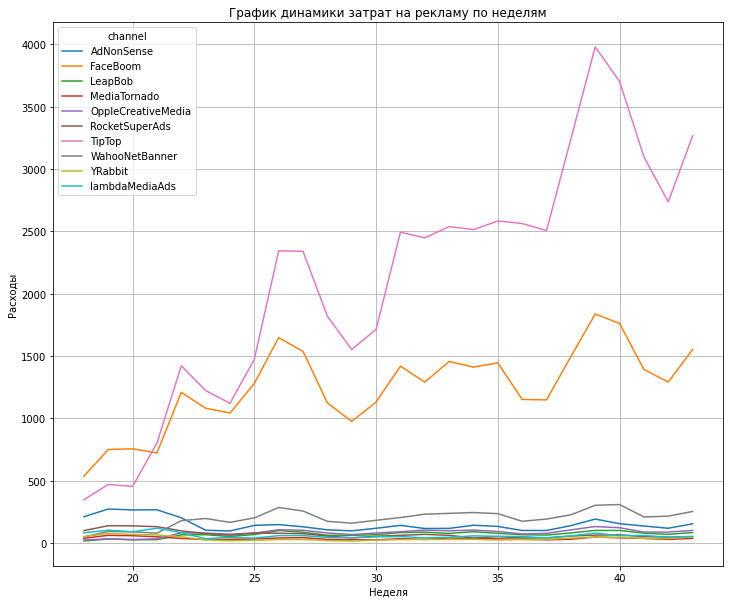

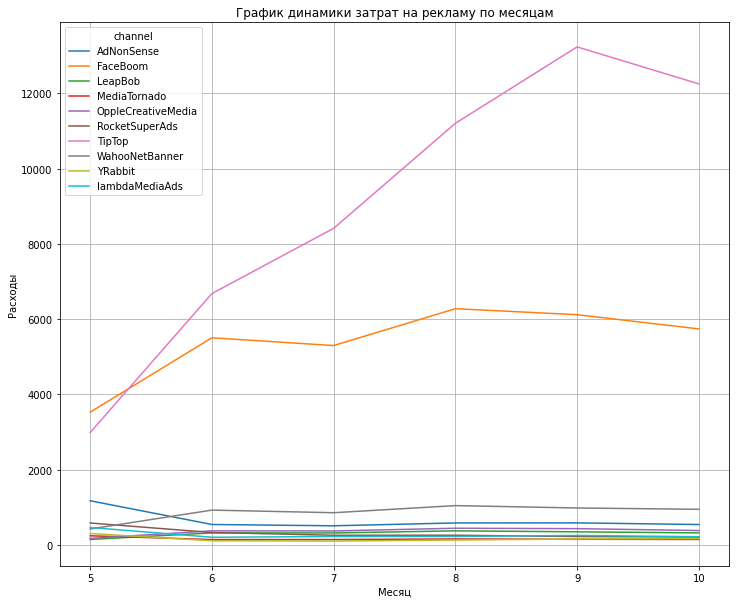

In [26]:
#Строим график по неделям
ads_week_dyn = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')

ads_week_dyn.plot(figsize=(12, 10), grid=True)
plt.title('График динамики затрат на рекламу по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.show()

#Строим график по месяцам
ads_month_dyn = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')

ads_month_dyn.plot(figsize=(12, 10), grid=True)
plt.title('График динамики затрат на рекламу по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

- Посчитаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

In [27]:
cac = profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)
cac['acquisition_cost'] = round(cac['acquisition_cost'], 2)
display(cac)
display('Средняя стоимость привлечения одного пользователя (САС): ', round(profiles['acquisition_cost'].mean(),2))

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


'Средняя стоимость привлечения одного пользователя (САС): '

0.7

**Выводы**

1. Общая сумма расходов на маркетинг: 105 497.
2. Самые дорогостоящие рекламные источники: TipTop и FaceBoom с огромным отрывом от остальных.
3. Наименьшие затраты на каналы MediaTornado и YRabbit.
4. Наблюдается высокий рост расходов на канал TipTop вплоть до сентября.
5. Расходы на FaceBoom также росли, но плавнее и не так сильно. 
6. Расходы на прочие каналы близки друг к другу и не имеют резких пиков.
7. Наиболее высокая стоимость привлечения пользователя у канала TipTop - 2.8, тогда как САС следующего за ним канала FaceBoom составляет 1.11.
8. Стоимость привлечения канала organic - ноль, это пользователи, нашедшие сервис самостоятельно, без рекламы.

### 6. Оценка окупаемости рекламы <a id='roi'></a>

#### Общая окупаемость рекламы

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

Датой наблюдения считаем 1 ноября 2019 года, горизонт анализа 14 дней, т.к. в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

Чтобы не искажать данные, исключим органических пользователей.

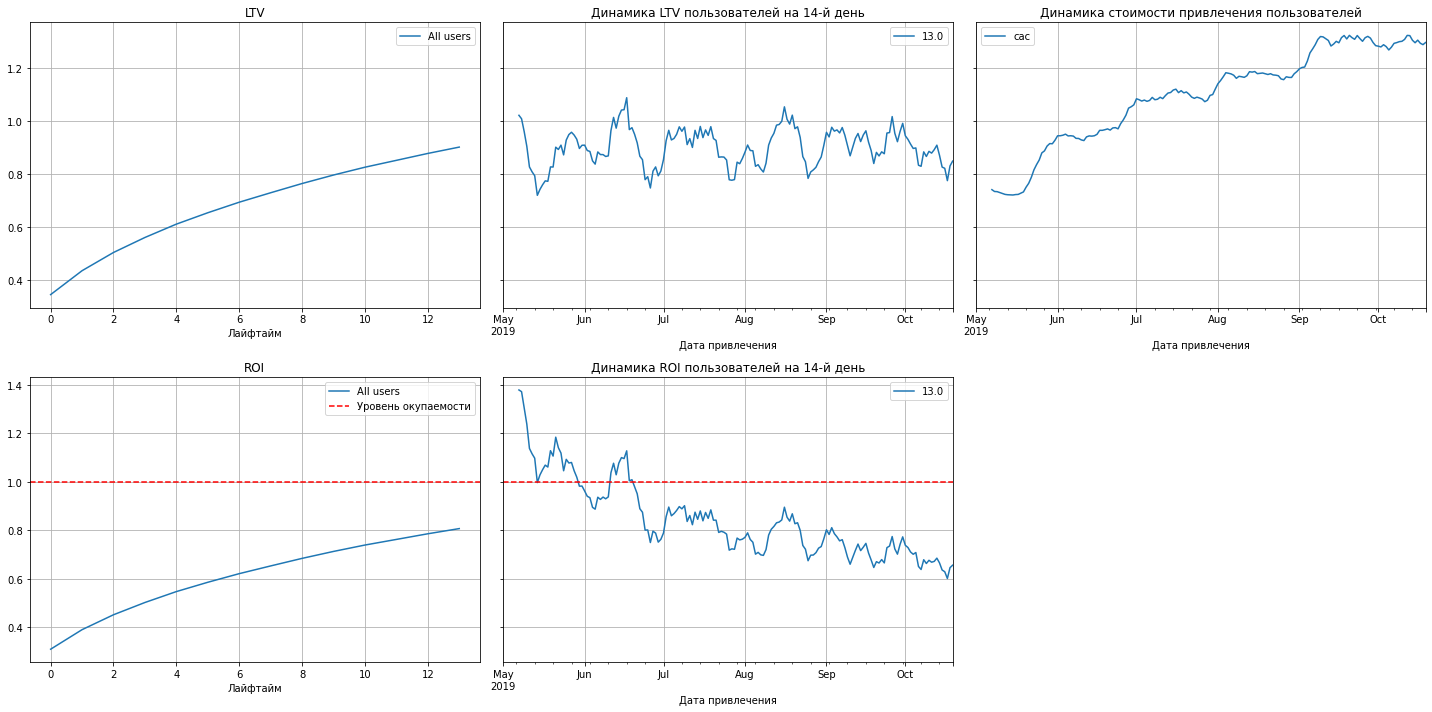

In [28]:
profiles = profiles.query('channel != "organic" ')
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

#С помощью заданной ранее функции, получим данные об LTV и ROI
ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profiles, orders, observation_date, horizon_days)

#Посмотрим графики по полученным данным
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days, window=7)

**Промежуточные выводы**

- Кривая LTV плавно растет, это значит, что когорты для анализа подобраны верно, функции работают исправно.
- Динамика LTV пользователя немного колеблется по неделям, но в целом остается одном уровне от месяца к месяцу.
- Стоимость привлечения пользователя растет.
- За требуемый период (две недели) реклама не окупается.
- Реклама перестала окупаться с июня, примерно в это же время мы видим увеличение затрат на рекламу. Далее, чем больше затраты на рекламу, тем дальше ROI от уровня окупаемости.

#### Окупаемость рекламы по устройствам

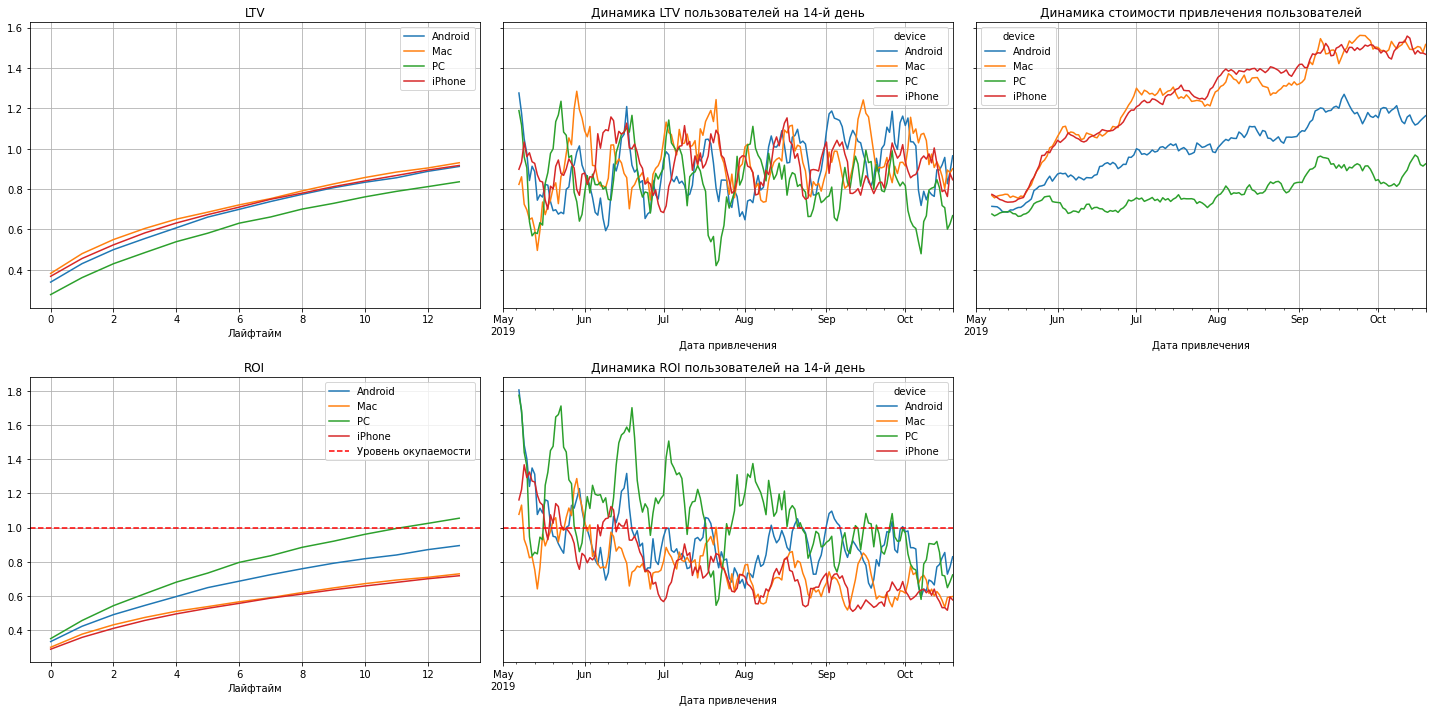

In [29]:
#Посмотрим на окупаемость рекламы с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profiles, orders, observation_date, horizon_days,
                                                                     dimensions=['device'])

#Посмотрим графики по полученным данным
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days, window=7)

**Промежуточные выводы**

- Самый низкий LTV у пользователей с устройствами РС, все остальные на одном уровне.
- В динамике LTV у пользователей с устройствами РС самые резкие колебания.
- Стоимость привлечения пользователей с РС самая низкая и это единственный тип устройств, ROI по которому выходит на уровнень окупаемости в заданный период (на 11-й день)
- Самая высокая стоимость привлечения и самая низкая окупаемость - Мас и iPhone.

#### Окупаемость рекламы по странам

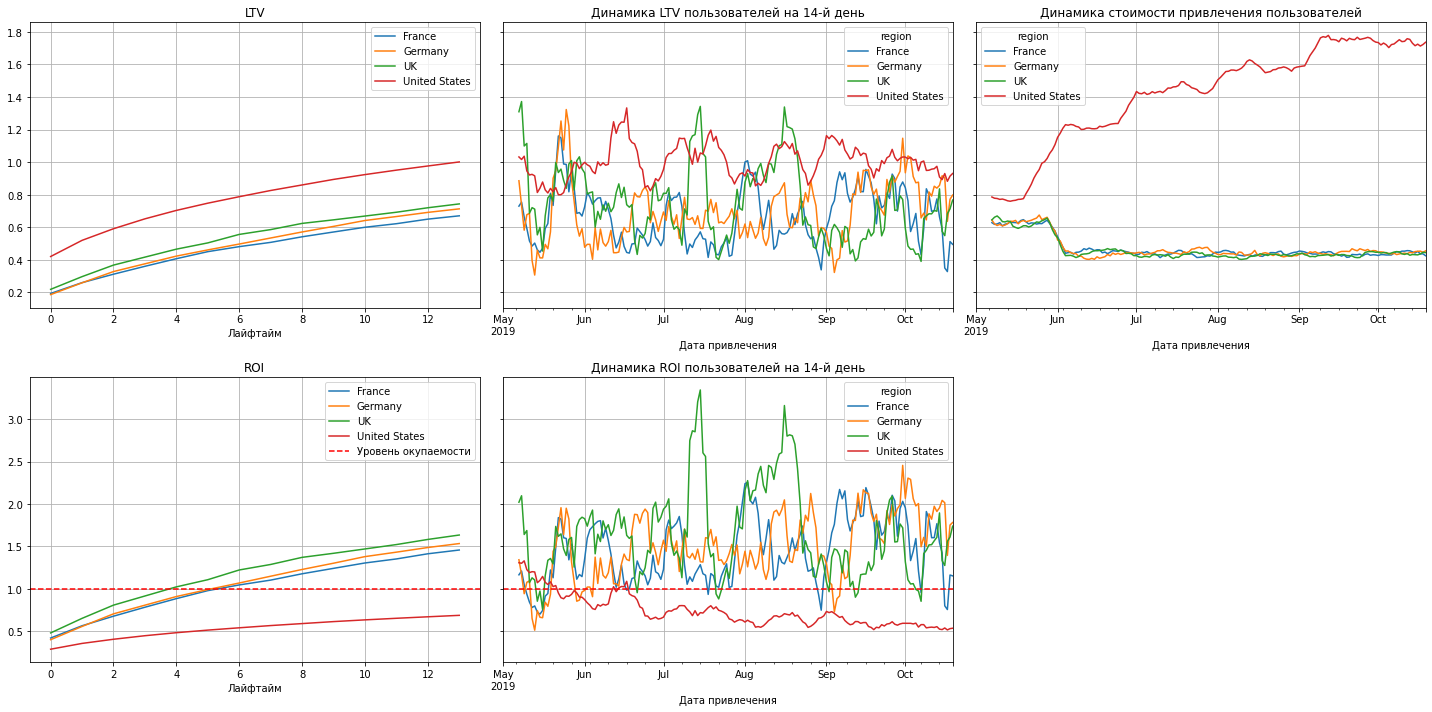

In [30]:
#Посмотрим на окупаемость рекламы с разбивкой по странам
ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profiles, orders, observation_date, horizon_days,
                                                                     dimensions=['region'])

#Посмотрим графики по полученным данным
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days, window=7)

**Промежуточные выводы**

- Самый низкий LTV у пользователей из США, все остальные на одном уровне.
- В динамике LTV пользователей из США стабильно, без резких колебаний, на высоком уровне. Более всего подвержен колебаниям LTV пользователей из Великобритании.
- Стоимость привлечения пользователей из США значительно выше остальных и с июня растет. Все прочие на одном уровне.
- Все пользователи, кроме пользователей из США переходят порог окупаемости уже на 4-5 лайфтайм. США не достигает порога в заданном горизонте.
- В динамике, ROI пользователей из США падает одновременно с ростом стоимости привлечения.

#### Окупаемость рекламы по рекламным каналам

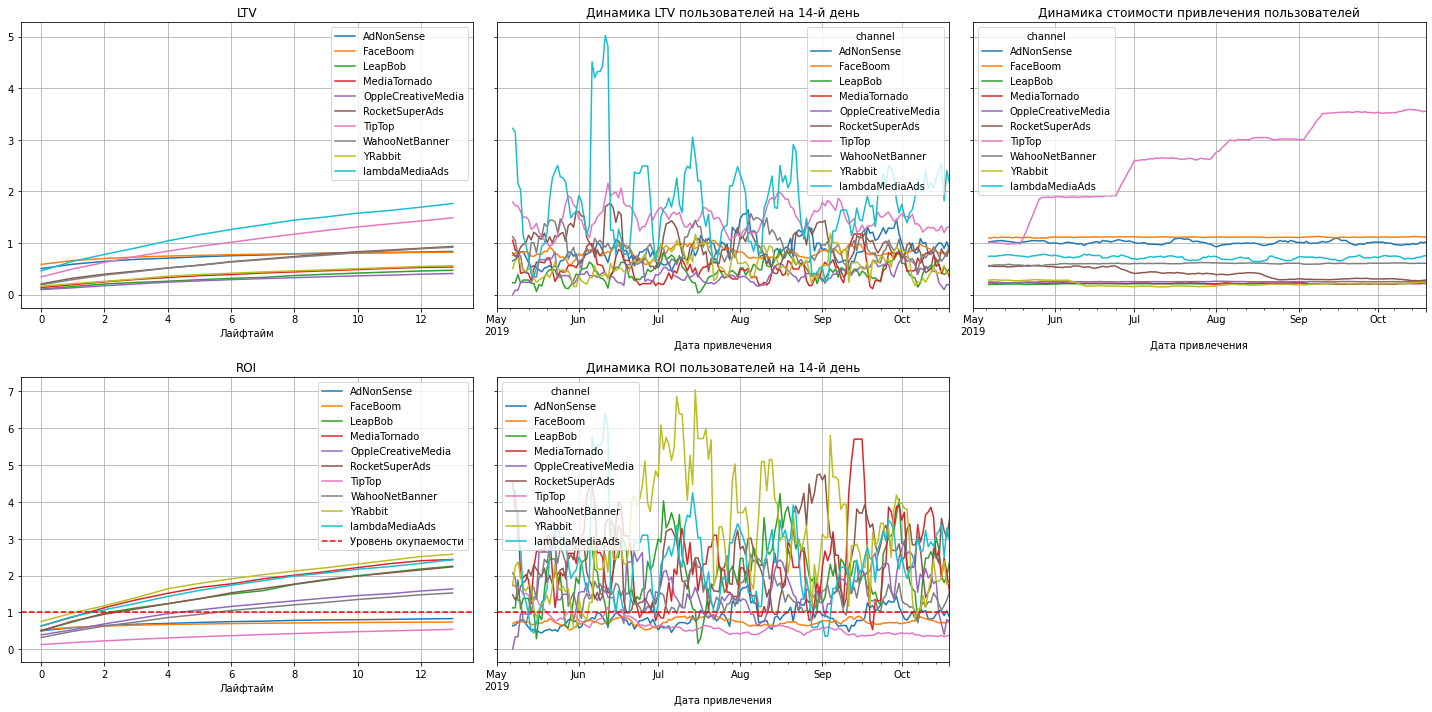

In [31]:
#Посмотрим на окупаемость рекламы с разбивкой по каналам
ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profiles, orders, observation_date, horizon_days,
                                                                     dimensions=['channel'])

#Посмотрим графики по полученным данным
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days, window=7)

**Промежуточные выводы**

- Наиболее высокий LTV у пользователей, привлеченных каналом продвижения lambdaMediaAds и TipTop.
- В динамике LTV lambdaMediaAds показывает самые сильные колебания, самый высокий пик - июнь.
- Стоимость привлечения пользователей каналов привлечения TipTop значительно выше остальных и растет с середины мая. Все прочие затраты почти не меняются с течением времени, несмотря на то, что ранее мы узнали о серьезном росте расходов на рекламу в FaceBoom.
- Не проходят порог окупаемости в заданный период и имеют самую высокую стоимость привлечения: TipTop, FaceBoom и AdNonSense.
- Наблюдаются высокие всплески в динамике ROI каналов lambdaMediaAds, YRabbit, MediaTornado.

#### Конверсия и удержание пользователей по устройствам

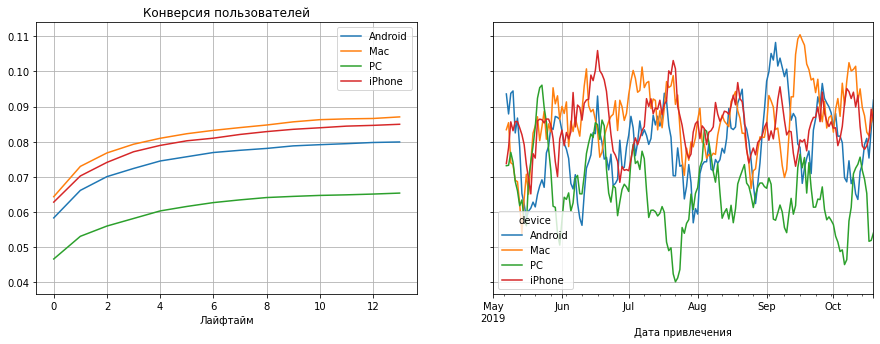

In [32]:
#Посмотрим на конверсию пользователей в разбивке по устройствам
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(profiles, orders, observation_date, horizon_days,
                                                                       dimensions=['device'])

plot_conversion(conversion_grouped, conversion_in_time, horizon_days)

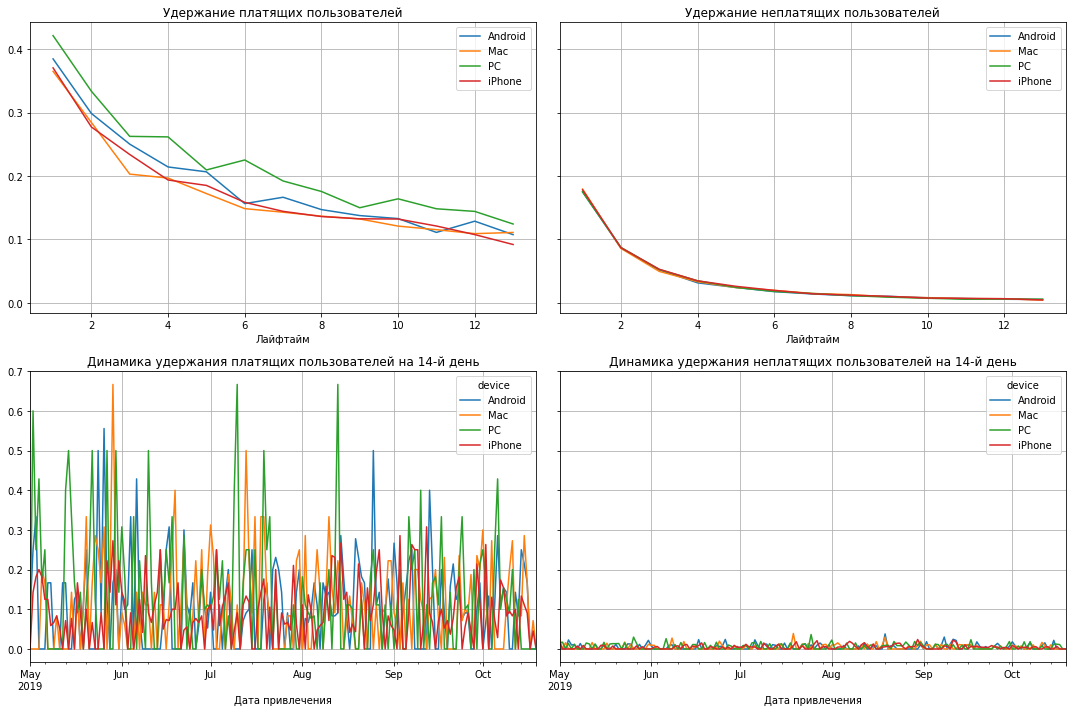

In [33]:
#Посмотрим на удержание пользователей в разбивке по устройствам
retention_raw, retention_grouped, retention_in_time = get_retention(profiles, visits, observation_date, horizon_days, 
                                                                    dimensions=['device'])
plot_retention(retention_grouped, retention_in_time, horizon_days)

**Промежуточные выводы**

- Самая высокая конверсия у пользователей, использующих Mac и iPhone, самая низкая - РС.
- Динамика удержания платящих пользователей выше всего у пользователей РС, ниже всего - iPhone.
- Динамика удержания неплатящих пользователей на одном уровне.

#### Конверсия и удержание пользователей по странам

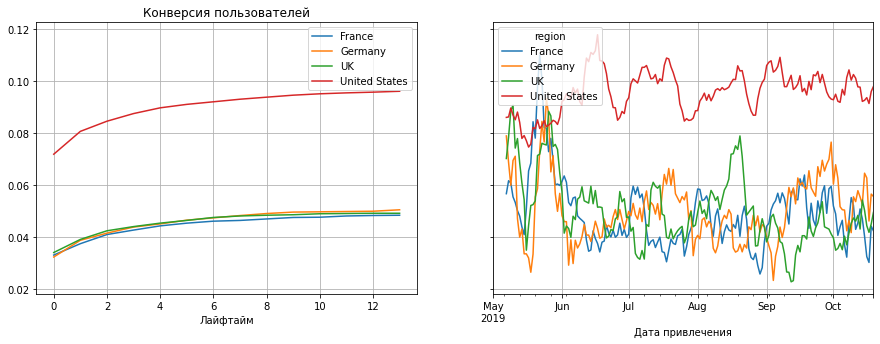

In [34]:
#Посмотрим на конверсию пользователей в разбивке по странам
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(profiles, orders, observation_date, horizon_days,
                                                                       dimensions=['region'])

plot_conversion(conversion_grouped, conversion_in_time, horizon_days)

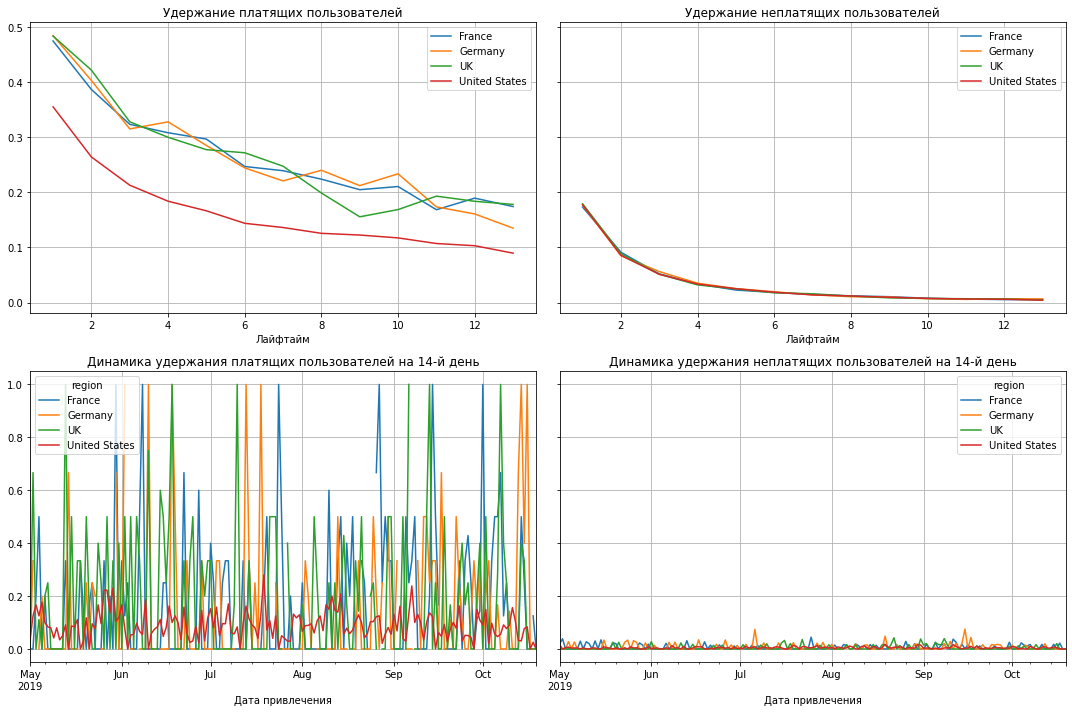

In [35]:
#Посмотрим на удержание пользователей в разбивке по странам
retention_raw, retention_grouped, retention_in_time = get_retention(profiles, visits, observation_date, horizon_days, 
                                                                    dimensions=['region'])
plot_retention(retention_grouped, retention_in_time, horizon_days)

**Промежуточные выводы**

- Самая высокая конверсия у пользователей из США, остальные близки друг к другу.
- Динамика удержания платящих пользователей ниже всего у пользователей из США, остальные близки друг к другу.
- Динамика удержания неплатящих пользователей на одном уровне.

#### Конверсия и удержание пользователей по рекламным каналам

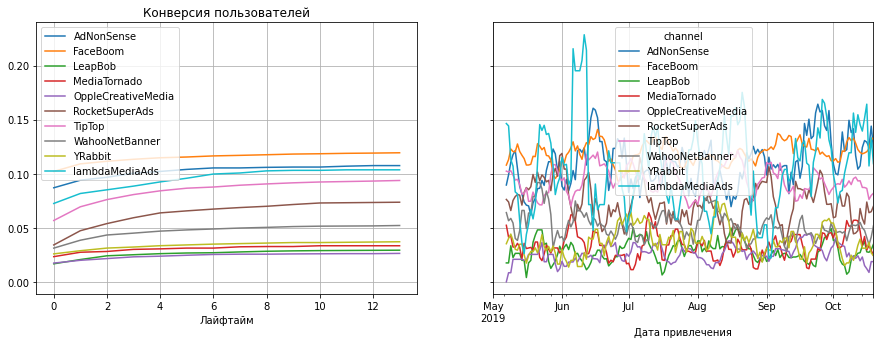

In [36]:
#Посмотрим на конверсию пользователей в разбивке по каналам
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(profiles, orders, observation_date, horizon_days,
                                                                       dimensions=['channel'])

plot_conversion(conversion_grouped, conversion_in_time, horizon_days)

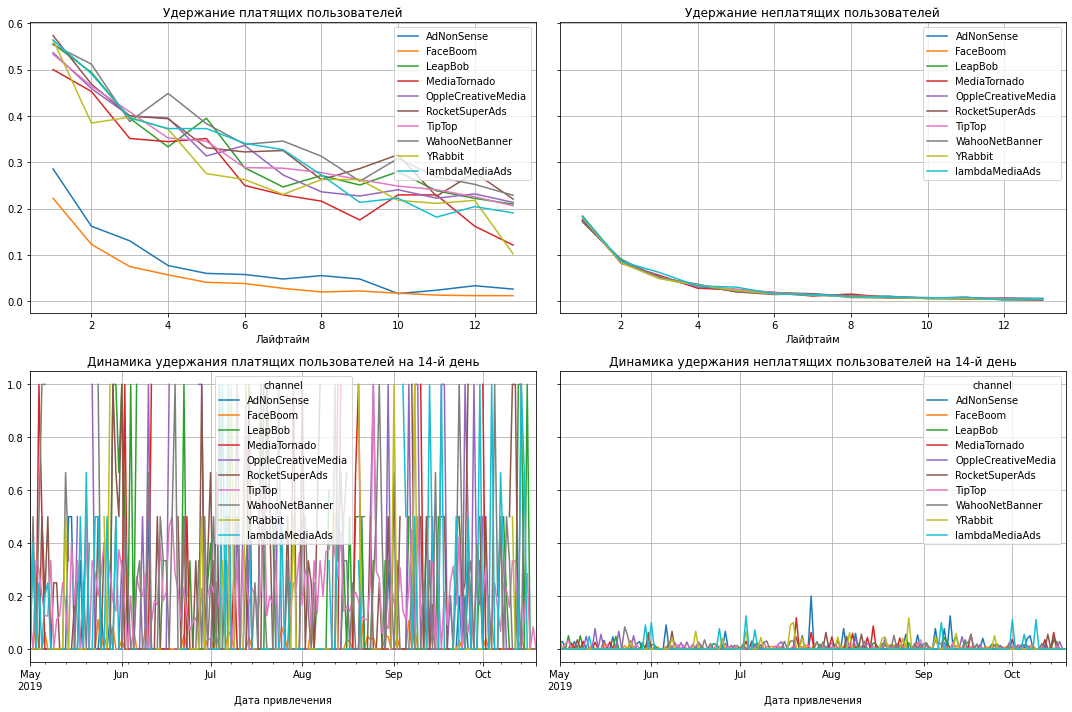

In [37]:
#Посмотрим на удержание пользователей в разбивке по каналам
retention_raw, retention_grouped, retention_in_time = get_retention(profiles, visits, observation_date, horizon_days, 
                                                                    dimensions=['channel'])
plot_retention(retention_grouped, retention_in_time, horizon_days)

**Промежуточные выводы**

- Самая высокая конверсия у пользователей из FaceBoom, AdNotSense и lambdaMediaAds
- Динамика удержания платящих пользователей ниже всего у каналов FaceBoom, AdNotSense, остальные каналы близки друг к другу по значениям.
- Динамика удержания неплатящих пользователей на одном уровне с незначительными пиками по различным каналам.

Стоит принять во внимание, что рынок США является самым крупным как по количеству платящих пользователей, так и по количеству пользователей в целом. Рассмотрим рекламные каналы только для США, отдельно от других регионов.

In [38]:
#Вспомним результаты исследовательского анализа
display('Количество пользователей и доля платящих по регионам', research(profiles, 'region', 'Регион'))

'Количество пользователей и доля платящих по регионам'

,Кол-во пользователей,"Платящие, %"
Регион,,
United States,61829,9.88
Germany,9528,5.14
UK,11154,5.10
France,11058,5.01


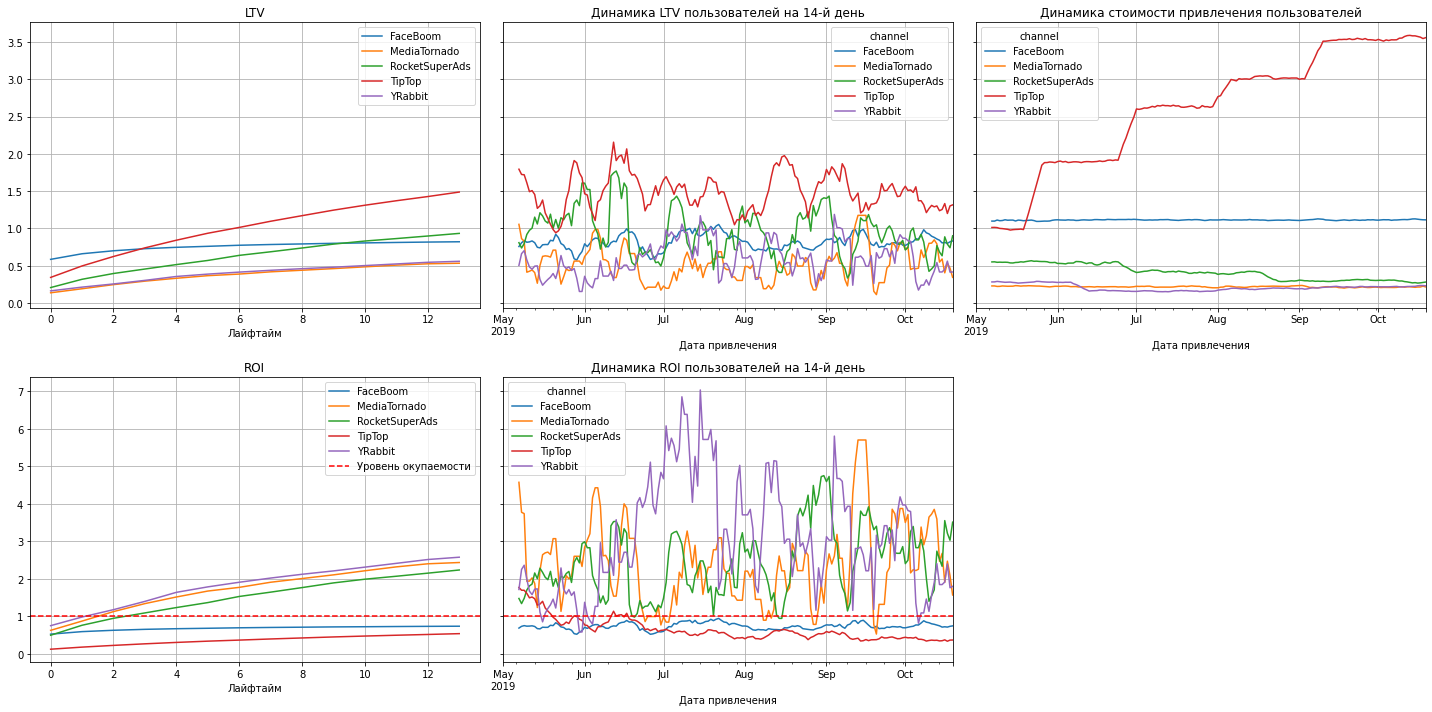

In [39]:
#Посмотрим на окупаемость рекламы только в США с разбивкой по каналам
profiles_usa = profiles.query('region == "United States"')
ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profiles_usa, orders, observation_date, horizon_days,
                                                                     dimensions=['channel'])

#Посмотрим графики по полученным данным
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days, window=7)

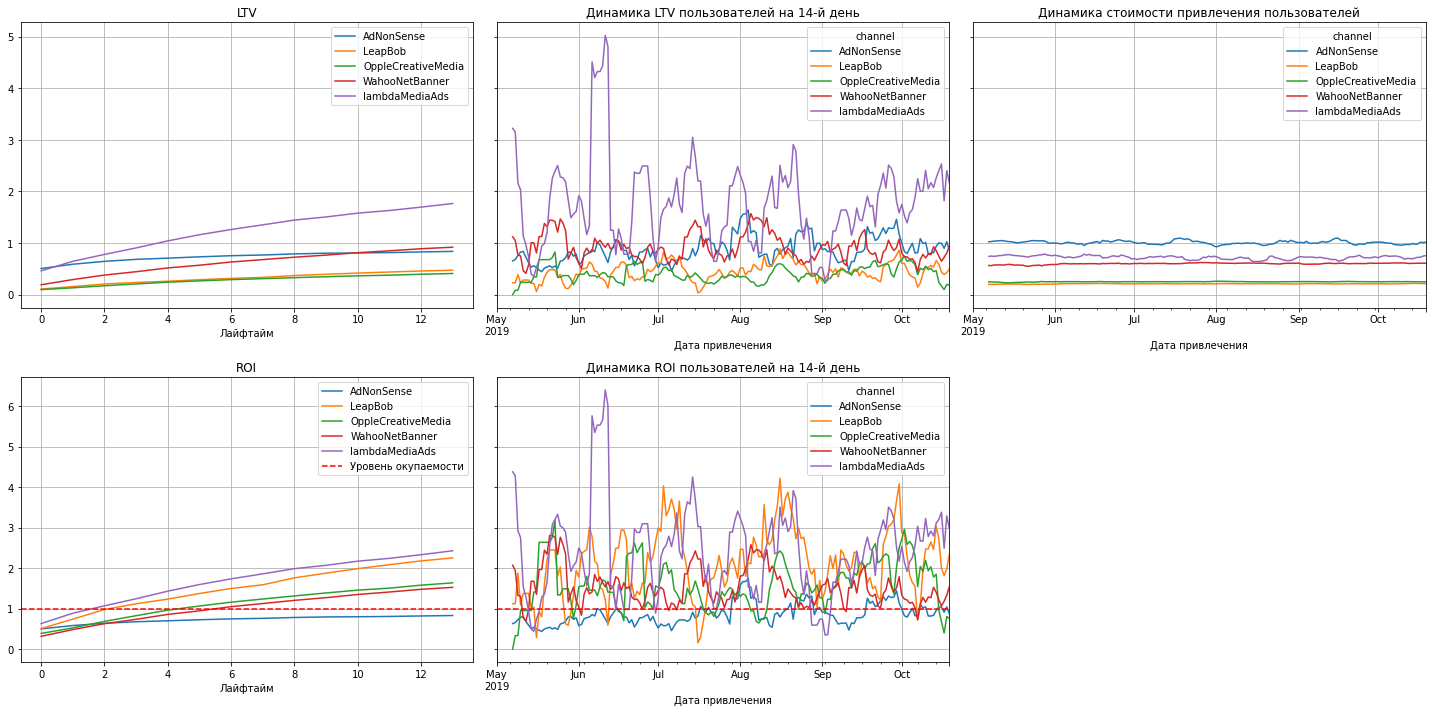

In [40]:
#Посмотрим на окупаемость рекламы В Великобритании, Германии и Франции с разбивкой по каналам
profiles_europe = profiles.query('region != "United States"')
ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profiles_europe, orders, observation_date, horizon_days,
                                                                     dimensions=['channel'])

#Посмотрим графики по полученным данным
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days, window=7)

#### Выводы по оценке окупаемости

Поведем итоги исследования и попробуем ответить на вопросы:

- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?

Реклама перестала окупаться в июне. Не окупаются три канала - TipTop, FaceBoom и AdNonSense. Чтобы найти причины, мы посмотрели показатели в разбивке по устройствам, каналам и странам.

Выяснилось, что в середине мая **увеличились расходы на рекламный канал TipTop** (вероятно, нацеленный на пользователей из **США**), это потянуло за собой серьезное увеличение стоимости привлечения пользователей из США и косвенно отразилось на ROI по устройствам - выросли затраты на американцев, предпочитающих **Mac и iPhone** и окупаемость рекламы по этим устройсвам упала. 

Нет оснований считать, что это совпадение и дело в технических проблемах на Mac и iPhone - графики четко показывают, что проблемы с окупаемостью начались именно с увеличением затрат на канал TipTop.

У пользователей из США самая высокая и стабильная конверсия, но при этом самый низкий показатель удержания платящих пользователей. Что важно - конверсия сильно выросла с момента запуска дорогостоящей рекламной кампании на TipTop. Т.е. реклама привлекла множество новых пользователей, но они не задержались надолго. Возможно, сама реклама была активной и привлекательной, но не отражала реальных свойств продукта и пользователи не нашли в приложении того, что зацепило их в рекламе.

Также, проведен отдельный анализ каналов продвижения для США и для других стран.
Лучшими показателями ROI в США обладают каналы YRabbit, RocketSuperAds и MediaTornado, в других странах - lambdaMediaAds, LeapBob.

Ниже для наглядности продублируем результаты исследовательского анализа каналов продвижения.

In [41]:
#Вспомним результаты исследовательского анализа
research(profiles, 'channel', 'Канал')

,Кол-во пользователей,"Платящие, %"
Канал,,
FaceBoom,29144,12.20
AdNonSense,3880,11.34
lambdaMediaAds,2149,10.47
TipTop,19561,9.60
RocketSuperAds,4448,7.91
WahooNetBanner,8553,5.30
YRabbit,4312,3.83
MediaTornado,4364,3.57
LeapBob,8553,3.06


### 7. Общие выводы <a id='conclusion'></a>

**- Общее:**

Датасеты содержат данные по пользователям, привлеченных в период с 1 мая 2019 г. по 27 октября 2019 г. Пропусков и дубликатов нет.

Представленны данные о пользователях из четырех стран (расположены в порядке убывания пользователей): США, Великобритания, Франция, Германия.

Наибольшая доля платящих пользователей приходится на США, наименьшая на Францию.

Больше всего платящих пользователей пользуется Mac, несмотря на то, что общее количество пользователей с устройством iPhone почти в два раза больше.

Общая сумма расходов на маркетинг составляет 105 497 у.е.

Каждый пользователь в среднем приносит 24.3 у.е. Медианное значение 14.9. Минимальное 4.99, максимальное 149.88.

Средняя стоимость привлечения одного пользователя (САС): 0.7

**- Причины неэффективности привлечения пользователей:**

Не окупаются три канала - TipTop, FaceBoom и AdNonSense.

**- Рекомендации для отдела маркетинга:**

1. Остановить текущую рекламную кампанию в TipTop и проанализировать качество рекламы с целью увеличения количества платящих пользователей. Канал второй по количеству привлеченных пользователей (19,5 тысяч человек), но доля платящих составляет менее 10%. Этот канал имеет самый низкий показатель ROI из всех каналов. В динамике по месяцам ROI не пересекает пороговую границу окупаемости начиная с момента увеличения бюджета на данный канал. Является также самым дорогим каналом по стоимости привлечения пользователя. В числовых значениях - 2.8 у.е. против средней стоимости 0.7 у.е.

2. Просчитать возможность перейти на другую систему оплаты за рекламу на канале TipTop - оплата за покупку. 

3. То же касается канала FaceBoom - лидер по количеству привлеченных пользователей, но доля платящих пользователей сопоставима с каналами AdNonSense и lambdaMediaAds, которые привлекают кратно меньше людей. Рекламный бюджет на этот канал был увеличен, но он не окупается. Причем, в динамике по месяцам ROI не пересекает пороговую границу окупаемости ни до увеличения рекламного бюджета, ни после. Канал активно привлекает новых пользователей, но их удержание самое низкое из всех каналов. Необходимо понять причину низкого удержания.

4. Несмотря на то, что AdNonSense не окупается, он выглядит перспективным каналом - высокая конверсия, но есть проблемы с удержанием. Необходимо понять причину - целевая аудитория канала или качество рекламы и в зависимости от ответа, принять решение, перераспределять ли рекламный бюджет.

5. Для продвижения на рынках Великобритании, Германии и Франции уделить особое внимание каналу lambdaMediaAds: высокий LTV, ROI, конверсия и удержание. Рассмотреть возможность увеличения рекламного бюджета.

6. Для продвижения в США увеличить рекламный бюджет каналов YRabbit, MediaTornado, RocketSuperAds - перспективно выглядят по совокупности факторов, в том числе хороший уровень ROI. На текущий момент наименьшие затраты идут именно на каналы MediaTornado и YRabbit.